## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

## Data Preparation

In [164]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Importing dataset
episodes = pd.read_csv('datasets/office_episodes.csv')

#Colors list
def WhichColor(value):
    if value < 0.25:
        return 'red'
    elif np.logical_and(value >= 0.25, value < 0.50):
        return 'orange'
    elif np.logical_and(value >= 0.50, value < 0.75):
        return 'lightgreen'
    else:
        return 'darkgreen'

colors = [WhichColor(value) for value in episodes.scaled_ratings]

#Size list
def WhichSize(value):
    if value:
        return 250
    else:
        return 25
    
sizes = [WhichSize(value) for value in episodes.has_guests]


## Q1 Create a matplotlib scatter plot of the data that contains the following attributes:


Each episode's episode number plotted along the x-axis


Each episode's viewership (in millions) plotted along the y-axis


A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:


    Ratings < 0.25 are colored "red"
    Ratings >= 0.25 and < 0.50 are colored "orange"
    Ratings >= 0.50 and < 0.75 are colored "lightgreen"
    Ratings >= 0.75 are colored "darkgreen"
    
A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25


A title, reading "Popularity, Quality, and Guest Appearances on the Office"


An x-axis label reading "Episode Number"


A y-axis label reading "Viewership (Millions)"

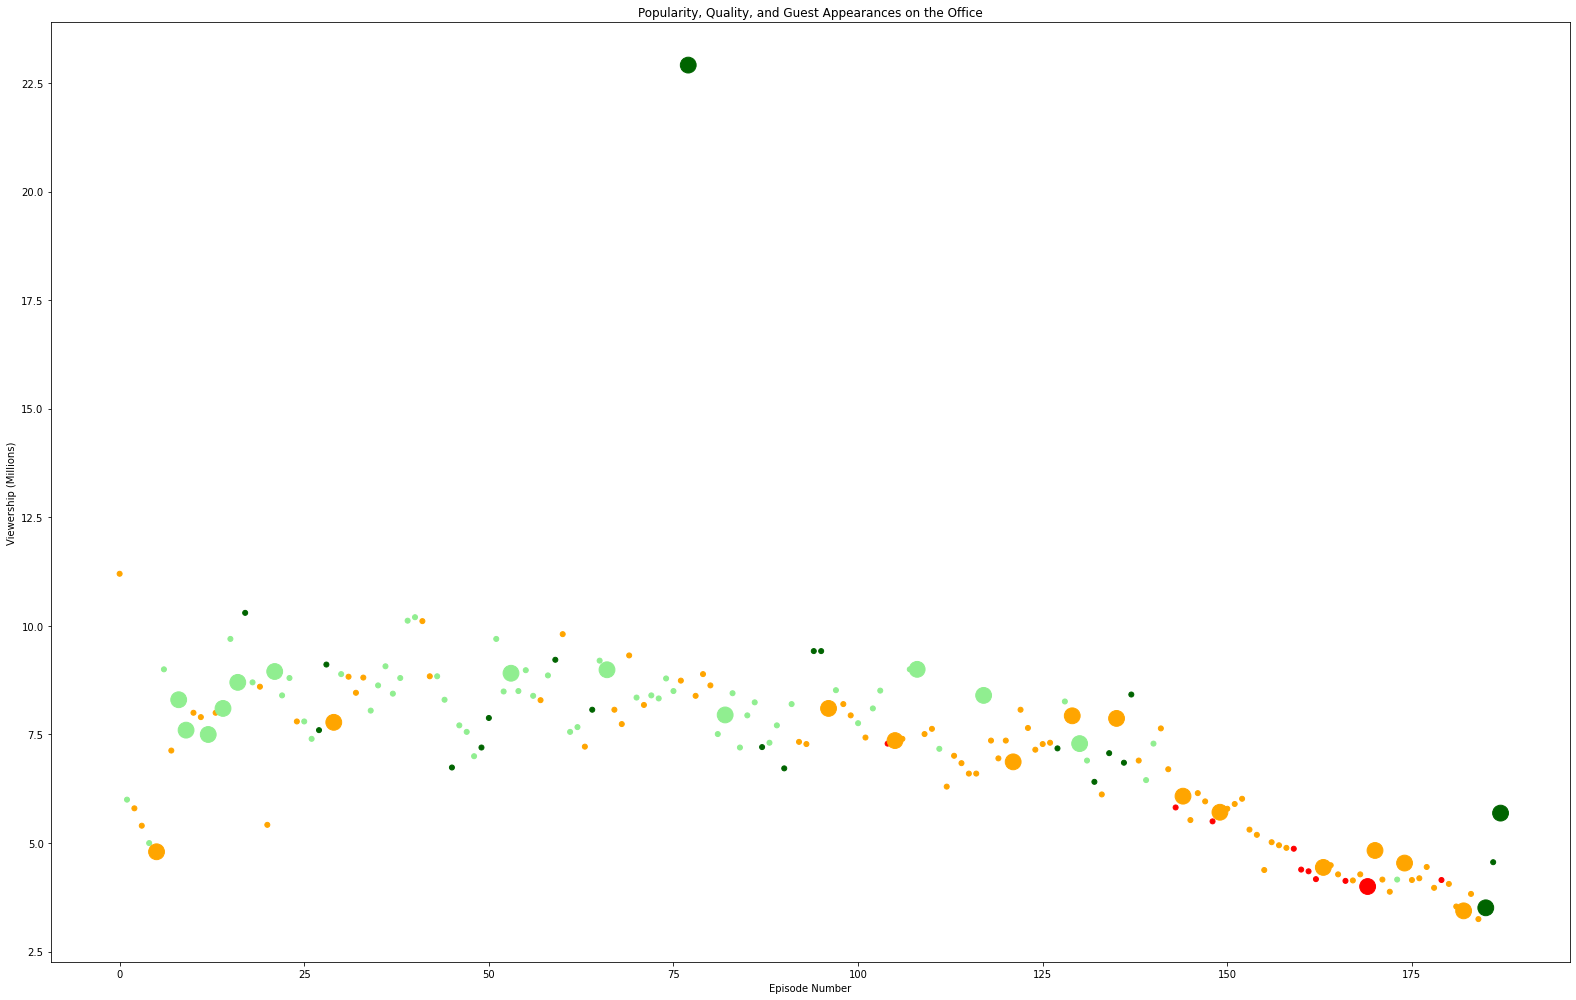

In [165]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [22, 14]
plt.scatter(episodes.episode_number, episodes.viewership_mil, 
           c=colors, s = sizes)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()


## Q2 Provide the name of top star
Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [166]:
# Most viewed episode with guest stars using pivot table
episodes_with_guests = episodes[episodes.has_guests == True]
pivot = episodes_with_guests.pivot_table(values='viewership_mil', index='episode_number',  aggfunc=[max])
most_viewed = episodes_with_guests[episodes_with_guests.viewership_mil == float(pivot.max())]

#Split guest stars
guest_stars = most_viewed['guest_stars'].values[0]
splitted_guest_stars = guest_stars.split(sep=',')

#First Top star
top_star = splitted_guest_stars[0]
print(top_star)

Cloris Leachman
